In [2]:
import pandas as pd
oil_data=pd.read_csv("/content/sample_data/CopyofBrentOilPrices.csv.csv")
oil_data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
oil_data["Date"]=pd.to_datetime(oil_data["Date"])

<ipython-input-4-9a951bf88459>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_data["Date"]=pd.to_datetime(oil_data["Date"])


<ipython-input-7-42ceb2df03da>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  oil_data_monthly = oil_data.resample('M').mean()


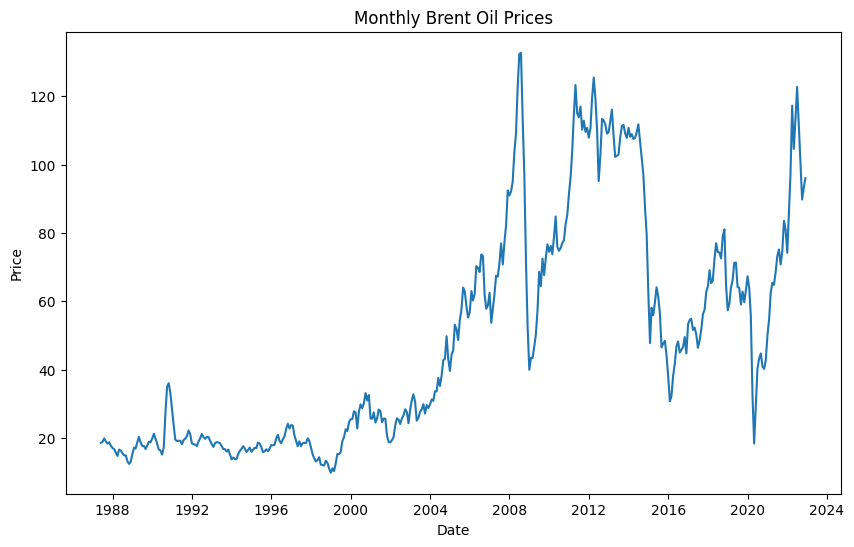

In [7]:

oil_data.set_index('Date', inplace=True)
oil_data_monthly = oil_data.resample('M').mean()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(oil_data_monthly)
plt.title("Monthly Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

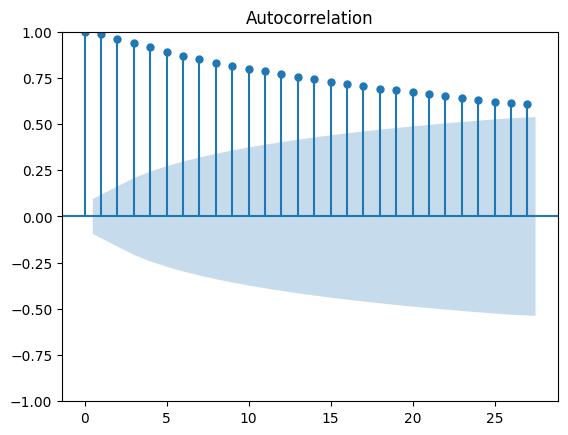

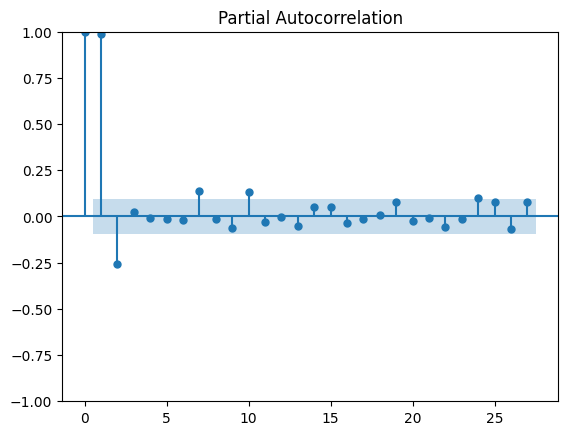

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  427
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1265.546
Date:                Thu, 07 Nov 2024   AIC                           2543.092
Time:                        12:15:14   BIC                           2567.419
Sample:                    05-31-1987   HQIC                          2552.702
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3493      0.031     11.176      0.000       0.288       0.411
ar.L2         -0.0413      0.033     -1.234      0.217      -0.107       0.024
ar.L3         -0.0584      0.035     -1.663      0.0

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(oil_data_monthly)
plot_pacf(oil_data_monthly)
plt.show()


model = ARIMA(oil_data_monthly, order=(5, 1, 0))
model_fit = model.fit()


print(model_fit.summary())


forecast = model_fit.forecast(steps=12)
print(forecast)

In [11]:
from arch import arch_model

garch_model = arch_model(oil_data_monthly, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()


print(garch_fit.summary())


garch_forecast = garch_fit.forecast(horizon=12)
print(garch_forecast.variance[-1:])

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12011.418050659086
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1858.2114396573065
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1961.5113287058034
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1785.467144951245
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1824.0105178222946
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1769.1659808329323
Iteration:      7,   Func. Count:     41,   Neg. LLF: 2570.8383729669695
Iteration:      8,   Func. Count:     47,   Neg. LLF: 2267.0640854048597
Iteration:      9,   Func. Count:     53,   Neg. LLF: 1780.2092592183058
Iteration:     10,   Func. Count:     59,   Neg. LLF: 2145.702113498198
Iteration:     11,   Func. Count:     66,   Neg. LLF: 6881.870709327599
Iteration:     12,   Func. Count:     72,   Neg. LLF: 1806.0348511699772
Iteration:     13,   Func. Count:     78,   Neg. LLF: 1911.7968962277125
Iteration:     14,   Func. Count:     84,   Neg. LLF: 

In [10]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 12.1 MB/s eta 0:00:00


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.1558
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0317
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0239
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0148
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0128
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0130
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0112
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0129
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0132
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0136
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0107
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0102
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0105
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0084
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0074
Epoch 16/20
1

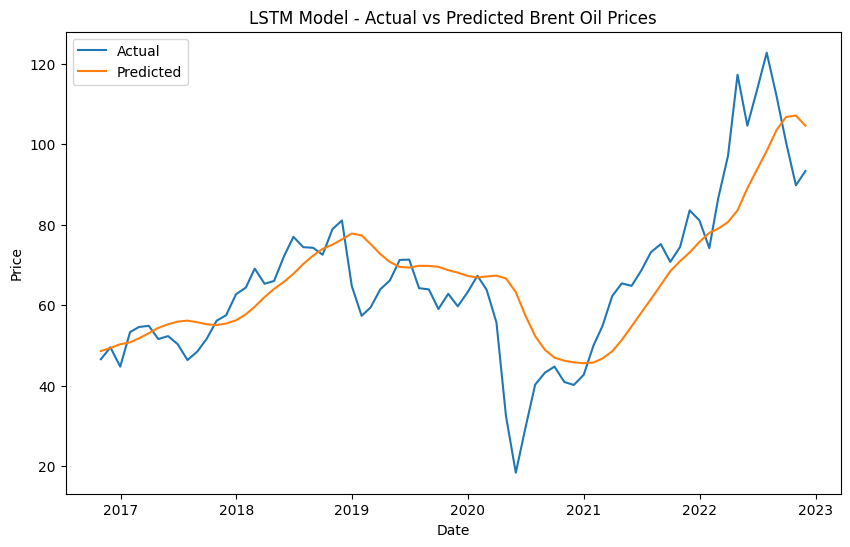

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


scaler = MinMaxScaler(feature_range=(0, 1))
oil_data_scaled = scaler.fit_transform(oil_data_monthly.values.reshape(-1, 1))


def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(oil_data_scaled, time_step)


X = X.reshape(X.shape[0], X.shape[1], 1)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
# Ensure both have the same length
plt.plot(oil_data_monthly.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(oil_data_monthly.index[-len(predictions):], predictions, label='Predicted')
plt.title("LSTM Model - Actual vs Predicted Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.1376
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0244
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0219
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0136
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0144
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0111
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0097
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0128
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0104
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0105
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0100
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0083
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0104
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0097
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0100
Epoc

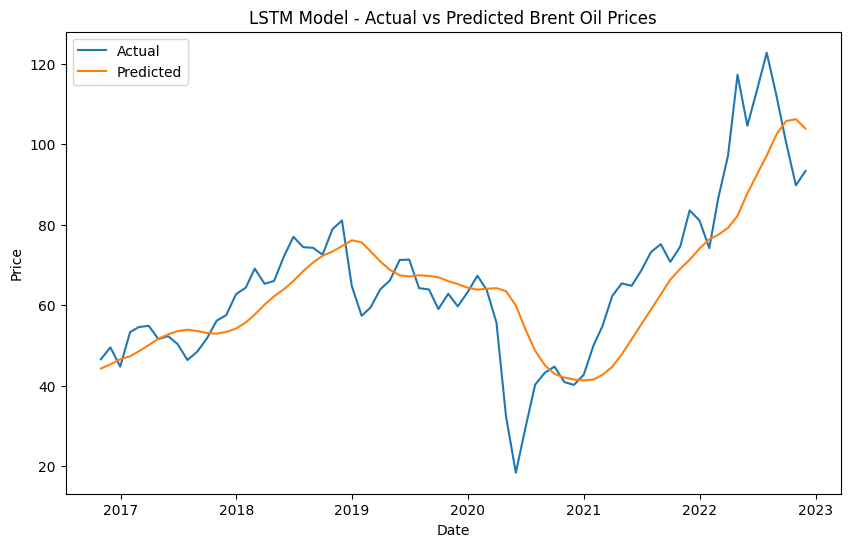

In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
oil_data_scaled = scaler.fit_transform(oil_data_monthly.values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Use the past 60 days to predict the next value
X, y = create_dataset(oil_data_scaled, time_step)

# Reshape X for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(oil_data_monthly.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(oil_data_monthly.index[-len(predictions):], predictions, label='Predicted')
plt.title("LSTM Model - Actual vs Predicted Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [13]:
!pip install tensorflow

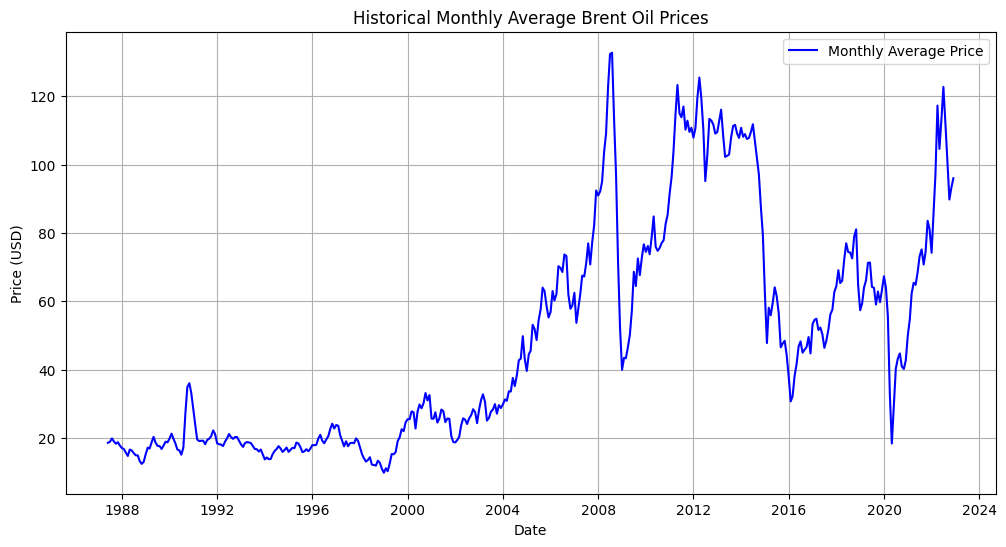

In [27]:
# Plot historical monthly Brent oil prices
plt.figure(figsize=(12, 6))
plt.plot(oil_data_monthly.index, oil_data_monthly['Price'], label='Monthly Average Price', color='blue')
plt.title('Historical Monthly Average Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

count    427.000000
mean      48.528337
std       32.944873
min        9.824286
25%       19.001190
50%       38.221364
75%       70.903292
max      132.718182
Name: Price, dtype: float64


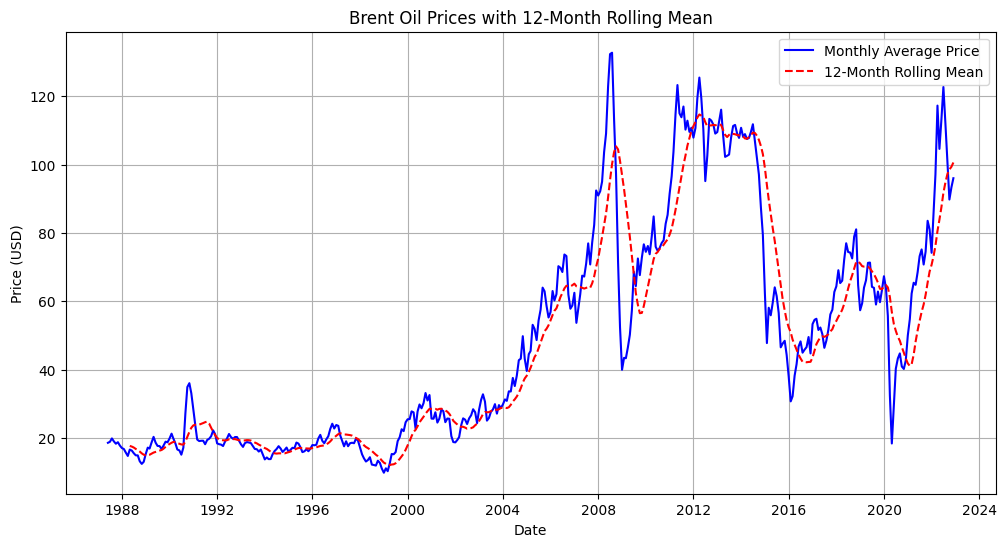

In [28]:
# Calculate basic statistics
statistics = oil_data_monthly['Price'].describe()
print(statistics)

# Calculate the rolling mean for a smoother trend
oil_data_monthly['Rolling_Mean'] = oil_data_monthly['Price'].rolling(window=12).mean()

# Plot the rolling mean along with the original data
plt.figure(figsize=(12, 6))
plt.plot(oil_data_monthly.index, oil_data_monthly['Price'], label='Monthly Average Price', color='blue')
plt.plot(oil_data_monthly.index, oil_data_monthly['Rolling_Mean'], label='12-Month Rolling Mean', color='red', linestyle='--')
plt.title('Brent Oil Prices with 12-Month Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


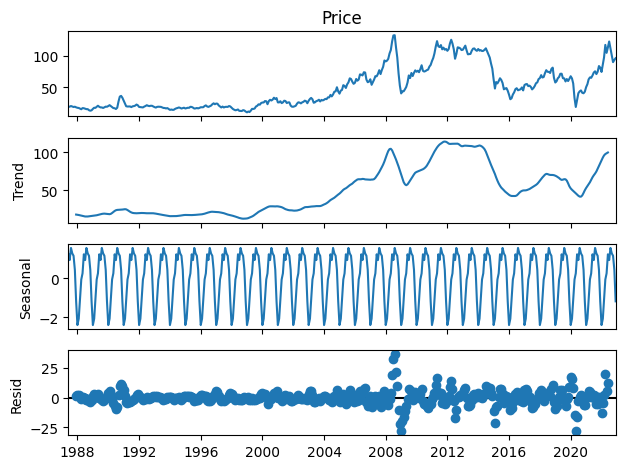

In [29]:
import statsmodels.api as sm

# Decompose the time series (seasonal decomposition)
decomposition = sm.tsa.seasonal_decompose(oil_data_monthly['Price'], model='additive', period=12)

# Plot the decomposition
decomposition.plot()
plt.show()


In [30]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Rescale the data to the range (0, 1) for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(oil_data_monthly['Price'].values.reshape(-1, 1))

# Prepare the data for LSTM (you'll need to define `create_dataset` to convert the data into sequences)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create data for LSTM
time_step = 12  # Use 12 months of data to predict the next month's price
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be 3D for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM model code goes here...


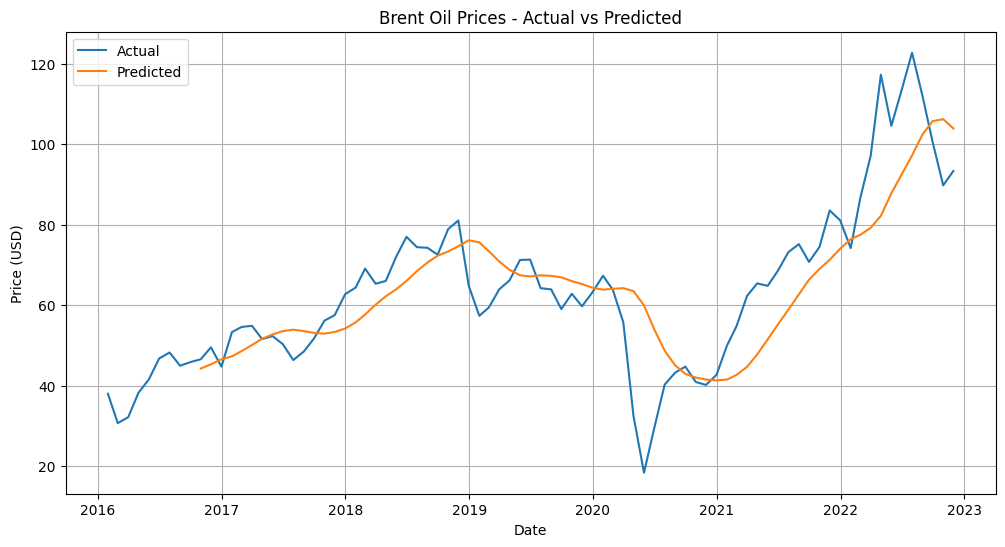

In [31]:
# Assuming `predictions` is the predicted data for test set
plt.figure(figsize=(12, 6))
plt.plot(oil_data_monthly.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(oil_data_monthly.index[-len(predictions):], predictions, label='Predicted')
plt.title("Brent Oil Prices - Actual vs Predicted")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
economic_data =pd.read_csv("/content/sample_data/Metadata_Indicator_API_ETH_DS2_en_csv_v2_23471.csv")
economic_data.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,VC.IHR.PSRC.P5,"Intentional homicides (per 100,000 people)",Intentional homicides are estimates of unlawfu...,UN Office on Drugs and Crime's International H...,NaN
1,VC.IDP.NWDS,"Internally displaced persons, new displacement...",Internally displaced persons are defined accor...,The Internal Displacement Monitoring Centre (h...,NaN
2,VA.PER.RNK.UPPER,"Voice and Accountability: Percentile Rank, Upp...",Voice and Accountability captures perceptions ...,"Detailed documentation of the WGI, interactive...",NaN
3,VA.EST,Voice and Accountability: Estimate,Voice and Accountability captures perceptions ...,"Detailed documentation of the WGI, interactive...",NaN
4,TX.VAL.TECH.CD,High-technology exports (current US$),High-technology exports are products with high...,"United Nations, Comtrade database through the ...",NaN


In [19]:


# Merge the oil price data with economic data
merged_data = oil_data_monthly.join(economic_data, how='inner')

# Re-run the LSTM model with additional features
X, y = create_dataset(merged_data.values, time_step)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # Adjusting the shape for multiple features

# Split the data and train a new model (follow similar steps as above)


FileNotFoundError: [Errno 2] No such file or directory: 'economic_indicators.csv'